In [1]:
#Number of Heads in tossing a coin N times
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Set number of tosses and probability of heads
N = 10000
p_heads = 0.5  # Set to any value between 0 and 1

# Step 2: Simulate coin tosses using np.random.choice
tosses = np.random.choice([0, 1], size=N, p=[1 - p_heads, p_heads])  # 0 = Tails, 1 = Heads

# Step 3: Count number of heads
num_heads = np.sum(tosses)

# Step 4: Compute probability of heads
estimated_p_heads = num_heads / N

# Step 5: Display results
print(f"Total tosses: {N}")
print(f"Number of heads: {num_heads}")
print(f"Estimated Probability of heads: {estimated_p_heads:.4f}")

Total tosses: 10000
Number of heads: 5026
Estimated Probability of heads: 0.5026


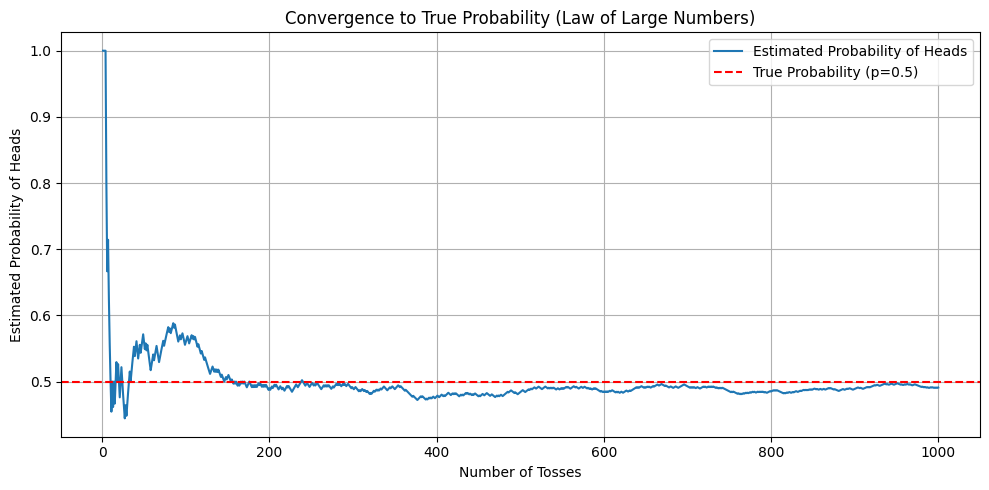

In [2]:
#Plot prob given N times of tossing
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000           # Number of tosses
p_heads = 0.5      # Probability of getting heads

# Simulate N coin tosses: 1 = Head, 0 = Tail
tosses = np.random.choice([0, 1], size=N, p=[1 - p_heads, p_heads])

# Compute running average (estimated probability of heads)
running_prob_heads = np.cumsum(tosses) / np.arange(1, N + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, N + 1), running_prob_heads, label='Estimated Probability of Heads')
plt.axhline(y=p_heads, color='red', linestyle='--', label=f'True Probability (p={p_heads})')
plt.xlabel('Number of Tosses')
plt.ylabel('Estimated Probability of Heads')
plt.title('Convergence to True Probability (Law of Large Numbers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.6  # Probability of winning
b = 1     # Odds: win b for every 1 bet
q = 1 - p

# Kelly-optimal fraction
f_kelly = (b*p - (1-p)) / b

# Simulation settings
num_trials = 100
num_simulations = 1000
f_values = 0.2
avg_log_wealth = []

# Run simulations
f = f_values
log_wealths = []
for _ in range(num_simulations):
      wealth = 1.0
      for _ in range(num_trials):
          if np.random.rand() < p:
              wealth *= (1 + f * b)
          else:
              wealth *= (1 - f)
      log_wealths.append(np.log(wealth))
avg_log_wealth.append(np.mean(log_wealths))
print("f_kelly is ", f_kelly)
print("The log of terminal financial wealth is")
print(f"{avg_log_wealth[0]:.4f}")



f_kelly is  0.19999999999999996
The log of terminal financial wealth is
2.0302


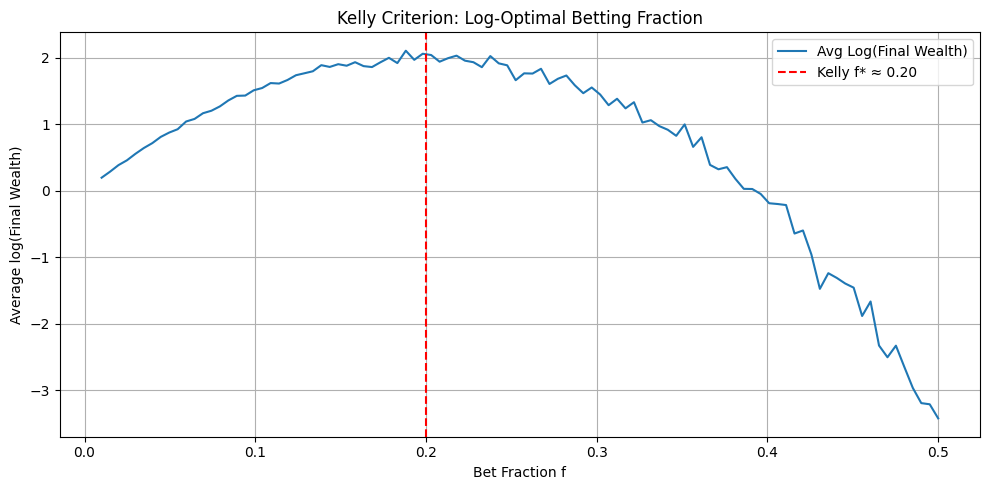

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.6  # Probability of winning
b = 1     # Odds: win b for every 1 bet
q = 1 - p

# Kelly-optimal fraction
f_kelly = (b*p - (1-p)) / b

# Simulation settings
num_trials = 100
num_simulations = 1000
f_values = np.linspace(0.01, 0.5, 100)  # Avoid f = 0 to prevent log(0)
avg_log_wealth = []

# Run simulations
for f in f_values:
    log_wealths = []
    for _ in range(num_simulations):
        wealth = 1.0
        for _ in range(num_trials):
            if np.random.rand() < p:
                wealth *= (1 + f * b)
            else:
                wealth *= (1 - f)
        log_wealths.append(np.log(wealth))
    avg_log_wealth.append(np.mean(log_wealths))

# Plot result
plt.figure(figsize=(10, 5))
plt.plot(f_values, avg_log_wealth, label='Avg Log(Final Wealth)')
plt.axvline(x=f_kelly, color='red', linestyle='--', label=f'Kelly f* ≈ {f_kelly:.2f}')
plt.title('Kelly Criterion: Log-Optimal Betting Fraction')
plt.xlabel('Bet Fraction f')
plt.ylabel('Average log(Final Wealth)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()